# 项目：航空公司乘客满意度预测_机器学习_思路2

## 1. 分析目标

该数据集包含航空公司乘客满意度调查结果，可以用于分析哪些因素与满意（或不满意）的乘客高度相关，并构建机器学习模型，预测乘客的满意度水平（1.满意 2.中立或不满意）。  

## 2. 简介

数据每列含义如下：
- `Gender`: 乘客的性别（女、男）
- `Customer Type`: 乘客类型（忠实客户、流动性客户）
- `Type of Travel`：乘客的飞行目的（个人旅行、商务旅行）
- `Class`：乘客乘坐飞机的旅行舱（Business - 商务舱、Eco - 经济舱、Eco-Plus - 舒适经济舱）
- `Flight Distance`：这段旅程的飞行距离
- `Inflight wifi service`：机上无线网络服务的满意度（0：没有；1-5）
- `Departure/Arrival time convenient`：离港/抵达时间方便的满意度
- `Ease of Online booking`：在线预订的满意度
- `Gate location`：登机口位置满意度
- `Food and drink`：食品和饮料的满意度
- `Satisfaction level of online boarding`：在线登机的满意度
- `Seat comfort`：座椅舒适度的满意度
- `Inflight entertainment`：机上娱乐的满意度
- `On-board service`：机上服务满意度
- `Leg room service`：腿部空间满意度
- `Baggage handling`：行李处理的满意度
- `Check-in service`：登机服务满意度
- `Inflight service`：机上服务满意度
- `Cleanliness`：清洁度满意度
- `Departure Delay in Minutes`：出发时延迟的分钟数
- `Arrival Delay in Minutes`：抵达时延迟的分钟数
- `Satisfaction`：航空公司满意度（满意、中立或不满意）

💡先安装scikit-learn-intelex加速器。`pip install scikit-learn-intelex`  
  
借助 Intel(R) Extension for Scikit-learn，您可以加速您的 Scikit-learn 应用程序，并且仍然完全符合所有 Scikit-Learn API 和算法。这是一款免费软件 AI 加速器，可为各种应用带来超过10-100 倍的加速。而且您甚至不需要更改现有代码！

## 3. 读取数据

导入数据分析所需要的库，并通过Pandas的`read_csv`函数，将原始数据文件"airline_survey_train.csv"里的数据内容，解析为DataFrame，并赋值给变量`original_data`。

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',None)

In [3]:
original_data = pd.read_csv("airline_survey_train.csv")
original_data.shape

(103904, 25)

应该是每一行记录对应一个乘客，每一列对应一个特征。共有103904个乘客。  
接下来可以取数据集的前几行和后几行具体查看一下。

In [4]:
original_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
original_data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


## 4. 评估、清洗和整理数据

在这一部分，将对在上一部分建立的`original_data`这个DataFrame所包含的数据进行评估。

评估主要从两个方面进行：结构和内容，即整齐度和干净度。  
数据的结构性问题指不符合“每列是一个变量，每行是一个观察值，每个单元格是一个值”这三个标准，数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

### 4.1 评估数据整齐度

In [6]:
original_data.sample(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
26085,26085,78749,Female,disloyal Customer,22,Business travel,Business,554,4,0,4,2,5,4,5,5,4,3,5,4,5,5,0,0.0,satisfied
18891,18891,62982,Male,Loyal Customer,27,Business travel,Business,2341,3,5,5,5,3,3,3,3,4,3,4,1,4,3,0,0.0,neutral or dissatisfied
54806,54806,113847,Male,disloyal Customer,28,Business travel,Business,1363,0,0,0,3,5,0,5,5,5,2,4,3,5,5,6,0.0,satisfied
7618,7618,23231,Male,Loyal Customer,31,Business travel,Business,2465,1,3,3,3,1,1,1,1,1,3,2,4,2,1,0,0.0,neutral or dissatisfied
92108,92108,129358,Male,Loyal Customer,68,Personal Travel,Eco Plus,2586,2,3,1,1,2,1,2,2,5,1,3,1,3,2,0,0.0,neutral or dissatisfied
16730,16730,13022,Male,Loyal Customer,66,Business travel,Business,374,3,1,1,1,1,3,4,3,3,2,3,2,3,3,15,19.0,neutral or dissatisfied
4688,4688,55447,Female,Loyal Customer,34,Personal Travel,Eco,2521,4,5,4,1,5,4,1,5,2,1,3,1,2,5,100,NaN,neutral or dissatisfied
31861,31861,10371,Female,Loyal Customer,41,Business travel,Business,247,1,1,1,1,2,4,4,5,5,5,5,5,5,5,0,0.0,satisfied
5445,5445,96232,Male,disloyal Customer,48,Business travel,Eco,328,2,3,2,4,4,2,2,4,1,3,3,3,4,4,8,2.0,neutral or dissatisfied
16096,16096,76899,Female,disloyal Customer,37,Business travel,Eco,230,4,5,4,2,2,4,2,2,3,4,2,5,1,2,0,0.0,neutral or dissatisfied


In [7]:
original_data['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

从抽样的数据来看，数据符合“每列一个变量，每行一个观察值，每个单元格一个值”，具体来看每行是关于一种商品的交易记录，每列是交易相关的各个变量，不存在结构性问题。

### 4.2 评估数据干净度

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

- 共有103904条观察值，`Arrival Delay in Minutes`有310个空缺值。    
- 前两个特征不影响分类，可以删除。  
- 许多列其实都是分类变量，但是这里它们对应的数值类型确是object或者int64，应该将它们都转化为category。  
`Gender`、`Customer Type`、`Type of Travel`、`Class`、以及从`Inflight wifi service`到`Cleanliness`，还有`Cleanliness`都算分类变量。

曾尝试将这n多列同时转化为category，但是因为numpy/pandas更新后的bug问题，它们现在提供的是CategoricalDtype，使用astype强制转化时一些自变量并未成功转化，这又引起了后续将二分类变量二值时的一系列问题。所以就先不对这些变量进行类型转化了。

In [9]:
original_data = original_data.drop(original_data.iloc[:,[0,1]], axis=1)
original_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
# categorical_indexes = [0, 1, 3, 4] + list(range(6,20))
# original_data.iloc[:,categorical_indexes] = original_data.iloc[:, categorical_indexes].astype(‘category')

In [12]:
objects=original_data[['Customer Type','satisfaction','Type of Travel','Class']]
objects

,Customer Type,satisfaction,Type of Travel,Class
0,Loyal Customer,neutral or dissatisfied,Personal Travel,Eco Plus
1,disloyal Customer,neutral or dissatisfied,Business travel,Business
2,Loyal Customer,satisfied,Business travel,Business
3,Loyal Customer,neutral or dissatisfied,Business travel,Business
4,Loyal Customer,satisfied,Business travel,Business
...,...,...,...,...
103899,disloyal Customer,neutral or dissatisfied,Business travel,Eco
103900,Loyal Customer,satisfied,Business travel,Business
103901,disloyal Customer,neutral or dissatisfied,Business travel,Business
103902,disloyal Customer,neutral or dissatisfied,Business travel,Eco


#### 评估缺失数据

`Arrival Delay in Minutes`特征有空缺值，但它对于整体的满意度预测好像并无关键性影响，不需要因为着310给缺失值而删掉这些记录。  
  
可以先对数据进行初步观察，后续再确定对于这些缺失值的处理方式。

#### 评估重复值

数据集中各个特征的值可以存在重复。

#### 评估不一致数据

根据数据内容来看，没有哪列可能存在不一致数据。

#### 评估无效或错误数据

In [13]:
original_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


从输出结果来看，并无错误或无效数据。

## 5. 数据可视化和主要特征的计算

### 5.1 以饼图展示目标变量

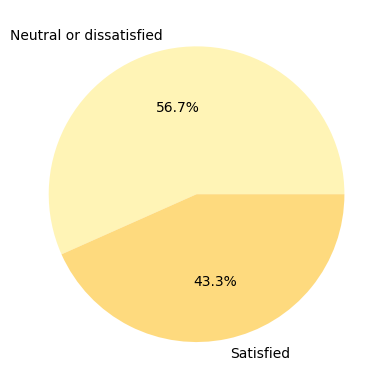

In [14]:
plt.pie(original_data.satisfaction.value_counts(), labels=["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

通过饼图可以看出，选择满意的乘客占小半部分。

### 5.2 计算数值型变量的相关性，并将其相关矩阵进行可视化展示

In [33]:
original_data_numerical1 = original_data.iloc[:, [2,6,20,21]]

In [34]:
corr_mat = original_data_numerical1.corr()
corr_mat

,Age,Inflight wifi service,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.017859,-0.010152,-0.012147
Inflight wifi service,0.017859,1.000000,-0.017402,-0.019095
Departure Delay in Minutes,-0.010152,-0.017402,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.019095,0.965481,1.000000


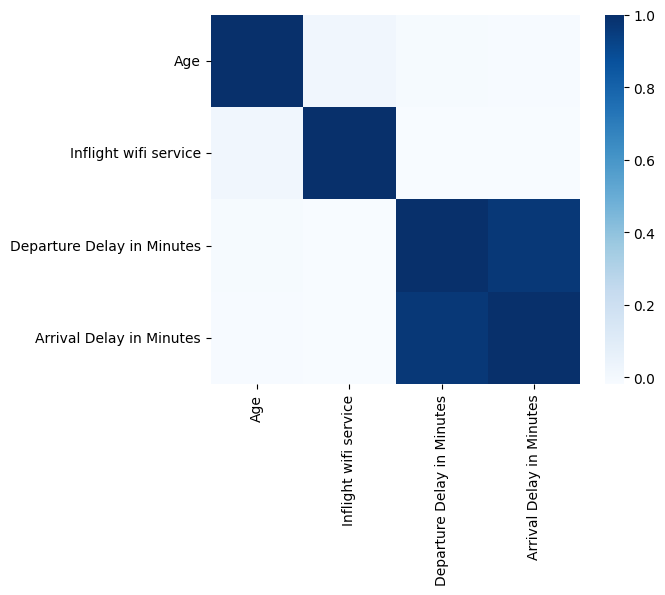

In [35]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

In [36]:
corr_mat.where(np.triu(corr_mat > 0.05, k=1)).stack().sort_values(ascending=False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
dtype: float64

为这两个特征创建散点图：

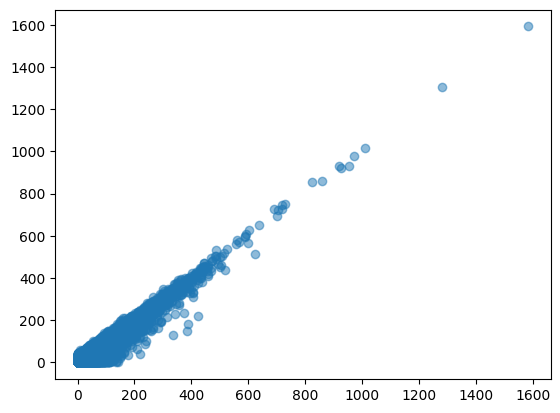

In [37]:
plt.scatter(original_data['Arrival Delay in Minutes'], original_data['Departure Delay in Minutes'], alpha=0.5)
pass

可以看出，散点图几乎拟合出了一条从左下角到右上角的直线。所以'Arrival Delay in Minutes'和'Departure Delay in Minutes'大致存在线性的正相关。  
  
这是有道理的，因为只要飞机航行过程种没有长时段的加速的话，一般起飞延误多长时间，降落就会延误多上时间。

### 5.3 饼图呈现各个分类特征中各个特征值所占的比率

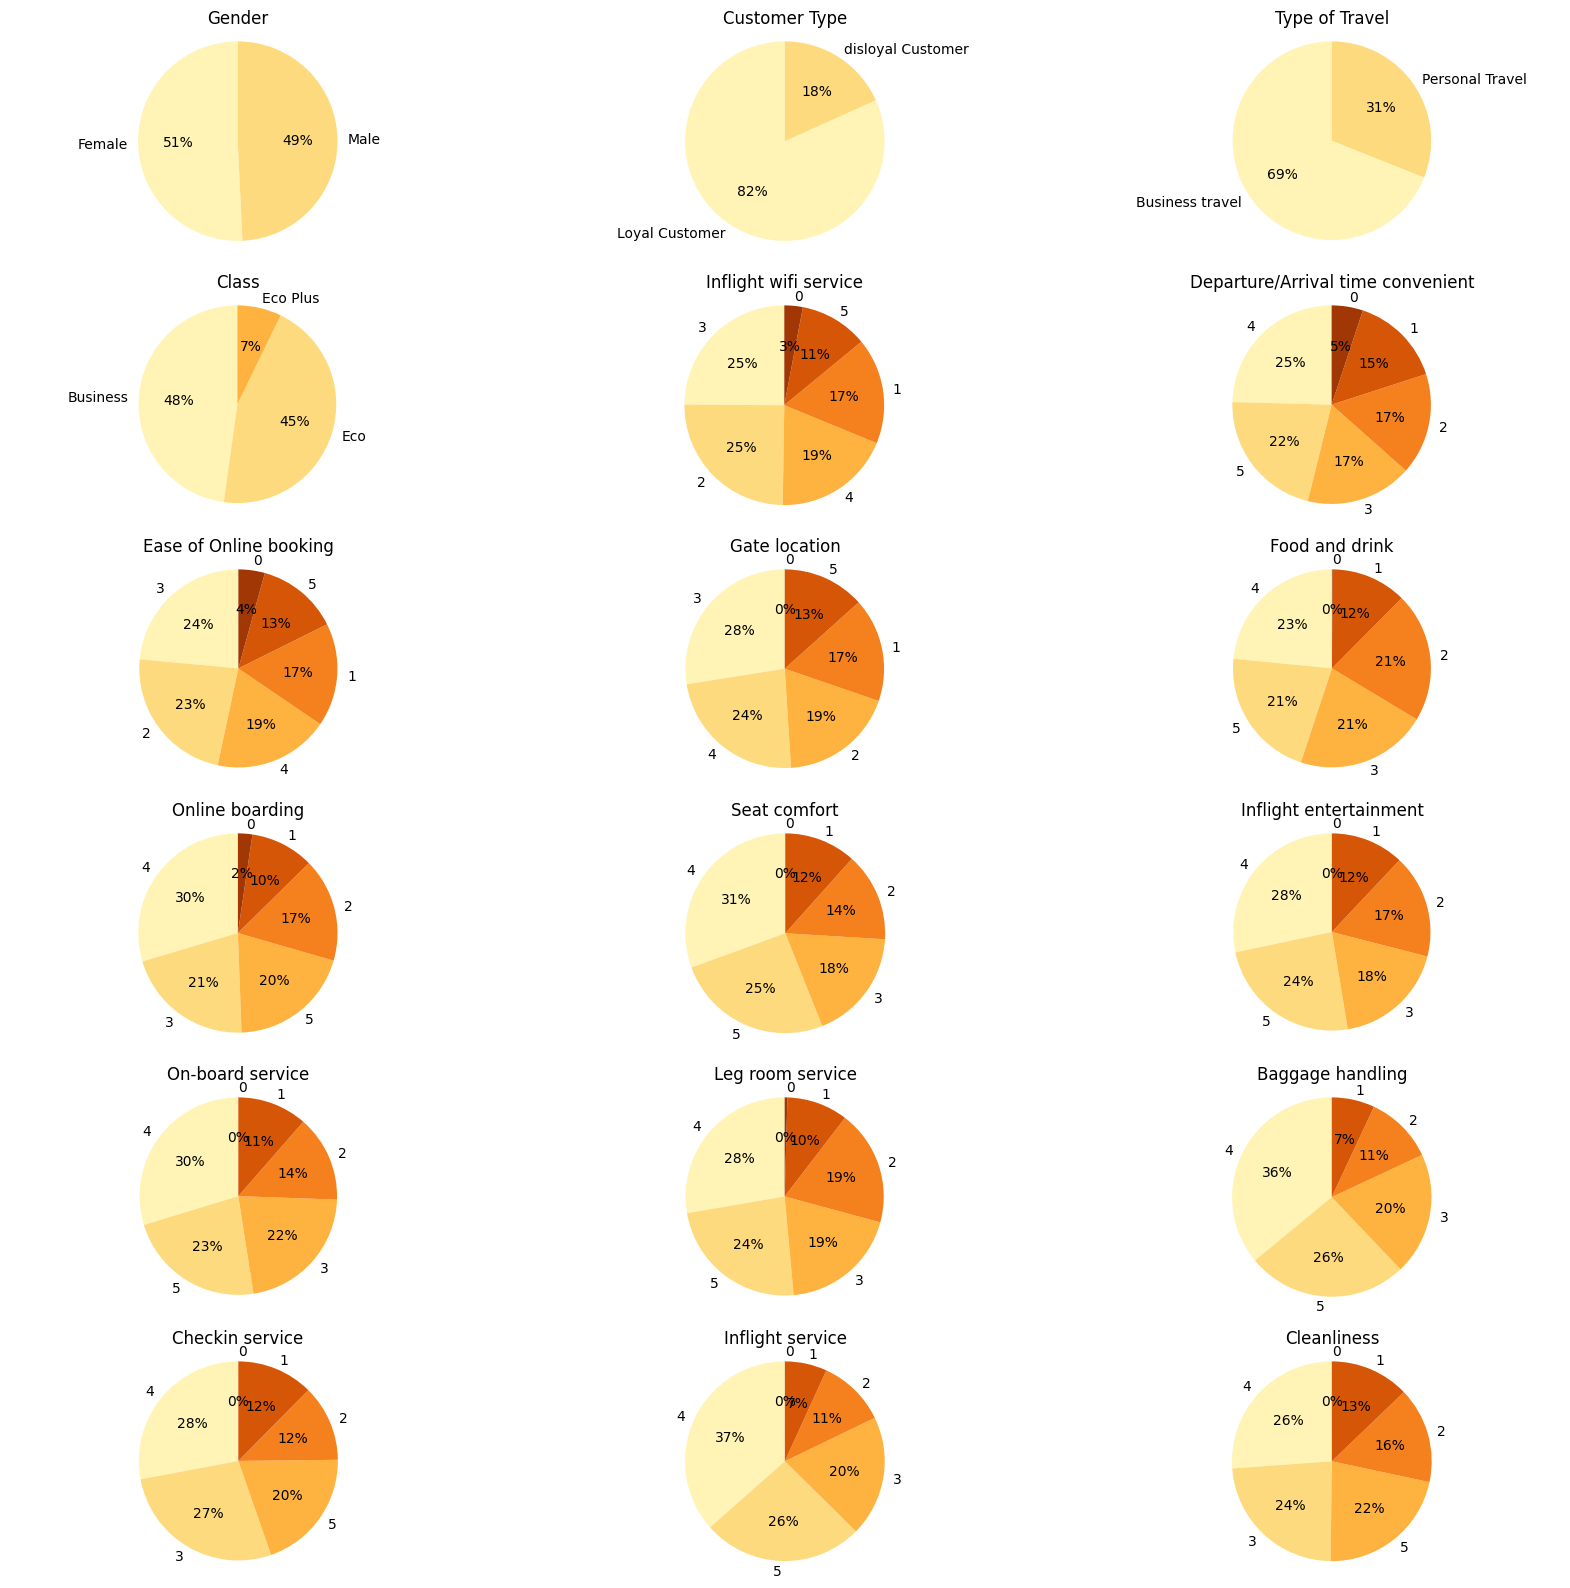

In [20]:
categ = original_data.iloc[:, categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize=(20,20))
for i, col in enumerate(categ):
    column_values = original_data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels=labels, colors=sns.color_palette("YlOrBr"), autopct='%1.0f%%', startangle=90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

从以上结果图可以看出：  
- 乘客中男女性别比基本持平。
- 大多数的乘客为忠实客户。
- 大多数乘客为商务旅行而非出于个人原因。  
- 超过60%的乘客对行李服务满意（得分为4、5）。  
- 超过50%的乘客觉得座位比较舒服（得分为4、5）。  
- 大约1/3的乘客对于在线预订的便宜性、登机口的位置比较满意。  
- 不到1/3的乘客对于机上wifi服务、食品和饮料感到满意。  
- 其它的服务满意的乘客占比大都在50%左右。  
总体来说，该航空还有很多需要提升的服务，不过行李服务确实相对满意度较高一些。

### 5.4 以箱图、直方图对数据进行其它可视化呈现

#### 5.4.1 固定客户和流动性客户及其年龄分布

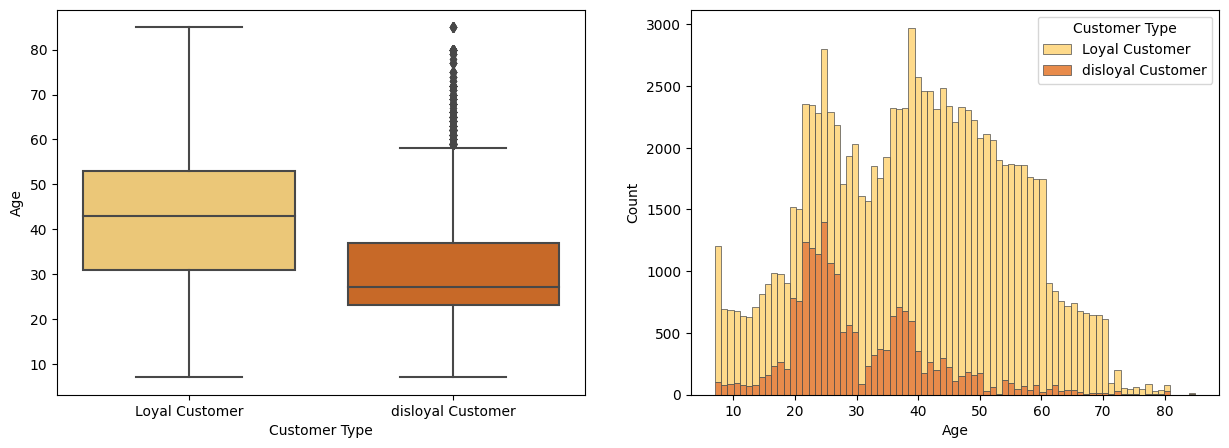

In [21]:
f, ax = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x="Customer Type", y="Age", palette="YlOrBr", data=original_data, ax=ax[0])
sns.histplot(original_data, x="Age", hue="Customer Type", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1])
pass

从以上箱图可以看出，该航司的大多数忠实的固定客户年龄在30-50之间，平均年龄微微高于40岁。而流动性客户则更年轻化一些，年龄范围大约在25-40岁之间，平均年龄略微低于30岁。

#### 5.4.2 不同舱位乘客的年龄分布

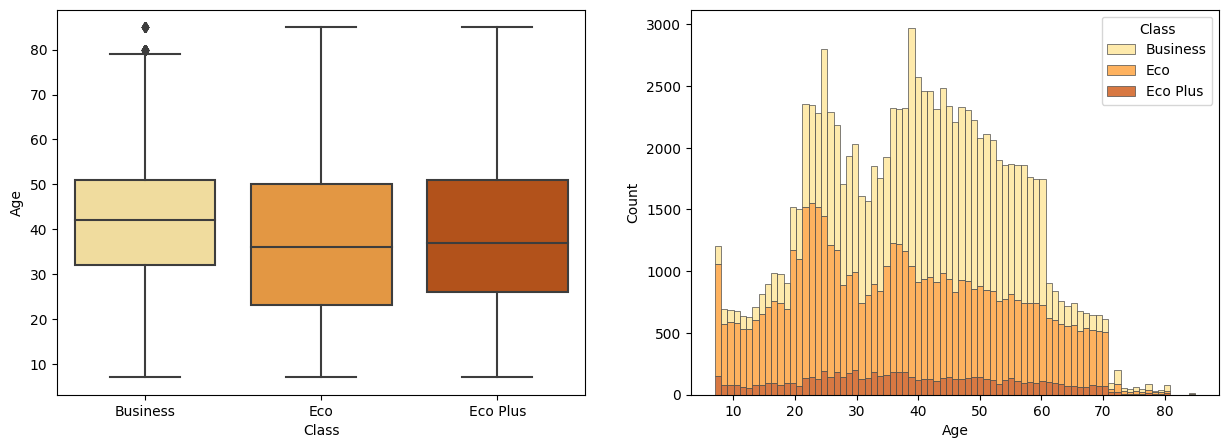

In [22]:
f, ax = plt.subplots(1, 2 , figsize=(15,5))
sns.boxplot(x="Class", y="Age", palette="YlOrBr", data=original_data, ax=ax[0])
sns.histplot(original_data, x="Age", hue="Class", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1])
pass

从结果图中可以看出，商务舱乘客的年龄范围及平均年龄与上面忠实客户的是一致的。有可能该航司的固定客户基本上就是买商务舱的那群人。

#### 5.4.3 不同舱位乘客的及其对应的飞行距离

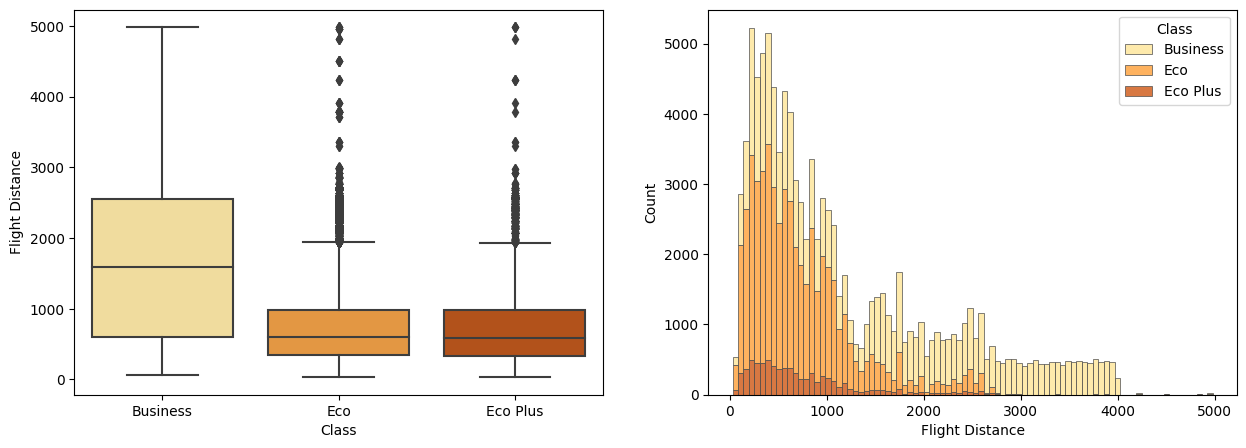

In [23]:
f, ax = plt.subplots(1, 2 , figsize=(15,5))
sns.boxplot(x="Class", y="Flight Distance", palette="YlOrBr", data=original_data, ax=ax[0])
sns.histplot(original_data, x="Flight Distance", hue="Class", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1])
pass

以上结果图表明，旅途飞行距离长的人更倾向于买商务舱。

#### 5.4.4 机上娱乐、腿部空间&飞行距离

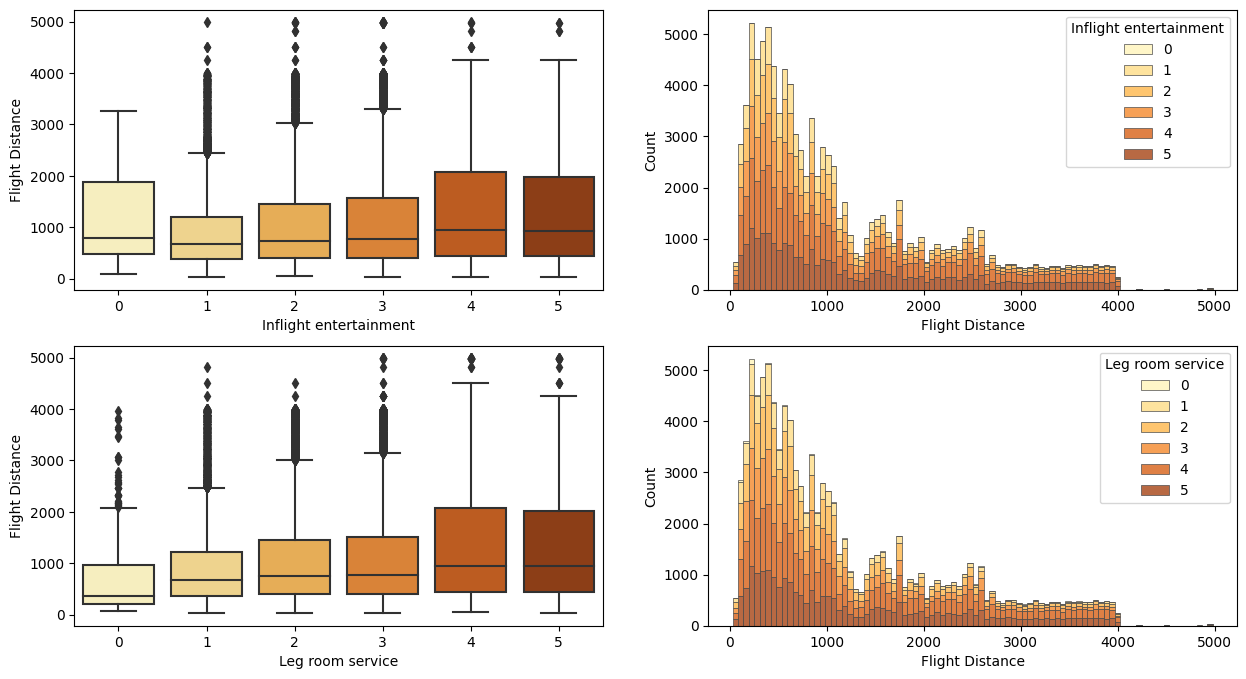

In [24]:
f, ax = plt.subplots(2, 2 , figsize=(15,8))
sns.boxplot(x="Inflight entertainment", y="Flight Distance", palette="YlOrBr", data=original_data, ax=ax[0,0])
sns.histplot(original_data, x="Flight Distance", hue="Inflight entertainment", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[0,1])
sns.boxplot(x="Leg room service", y="Flight Distance", palette="YlOrBr", data=original_data, ax=ax[1,0])
sns.histplot(original_data, x="Flight Distance", hue="Leg room service", multiple="stack", palette="YlOrBr", edgecolor=".3", linewidth=.5, ax=ax[1,1])
pass

从上图可以看出，随着飞行距离的增加，乘客对于机上娱乐服务、腿部空间的满意度也更高。

### 5.5 可视化呈现分类变量对于目标变量--满意度的影响

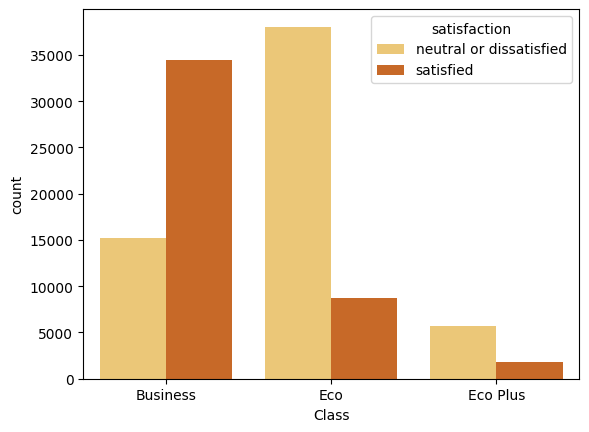

In [25]:
sns.countplot(x='Class', hue='satisfaction', palette="YlOrBr", data=original_data)
plt.show()

经济舱和经济升级舱的客户大多数不满意，而对该航司满意的则是商务舱的大多数客户。  
  
合理怀疑该航司将服务主要投入到了拥有更多忠实客户的商务舱上。

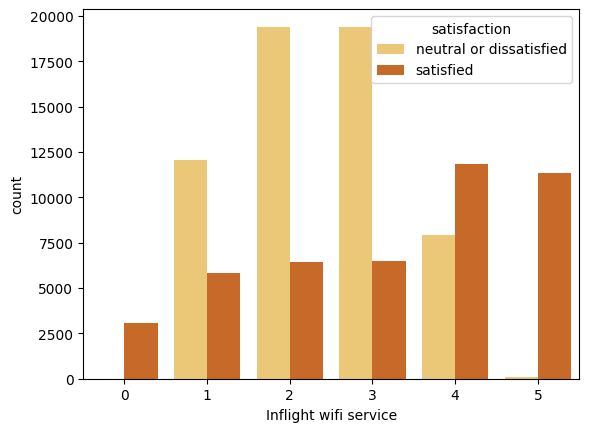

In [26]:
sns.countplot(x='Inflight wifi service', hue='satisfaction', palette="YlOrBr", data=original_data)
plt.show()

可以看出，对机上wifi服务打了5分的乘客基本上在对于整个航空的满意度上都选择了满意。而大多数对机上wifi服务不满意(1,2,3)的乘客对于该航空的整体满意度选择了不满意。

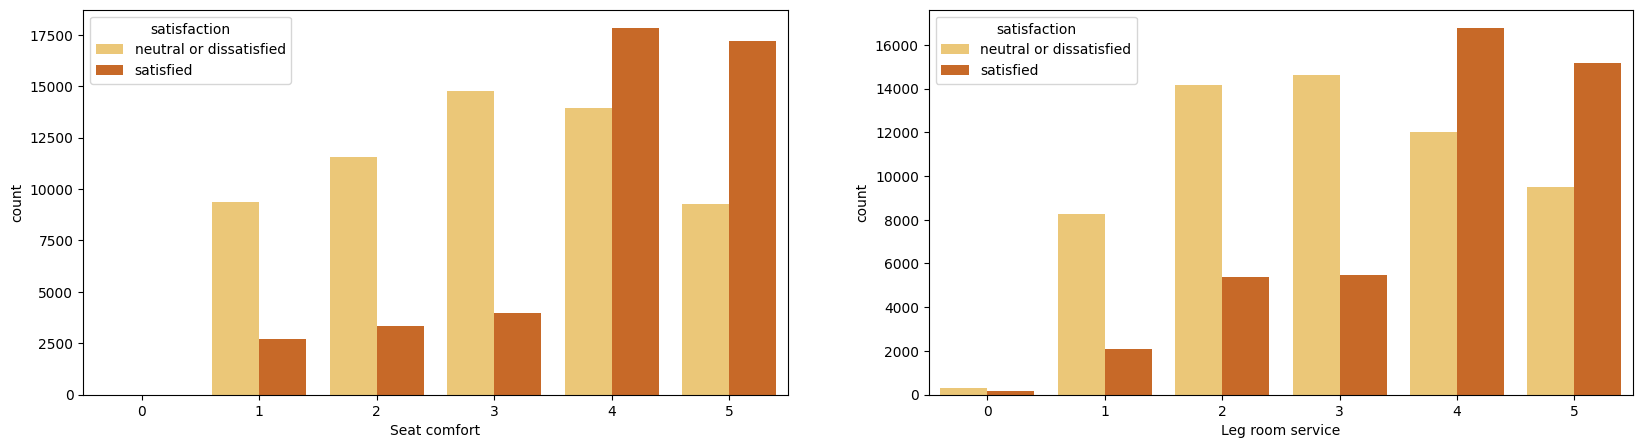

In [27]:
f, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x='Seat comfort', hue='satisfaction', palette="YlOrBr", data=original_data, ax=ax[0])
sns.countplot(x='Leg room service', hue='satisfaction', palette="YlOrBr", data=original_data, ax=ax[1])
plt.show()

对于座位舒适度、腿部空间打了4、5分的乘客，大部分也会对于satisfaction中选择满意。

## 6. 数据进一步整理

### 6.1 处理缺失值

In [28]:
original_data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

**选择使用中位数对于数值型特征空缺值进行填补：**

In [29]:
original_data['Arrival Delay in Minutes'].fillna(original_data['Arrival Delay in Minutes'].median(axis=0), inplace=True)

In [30]:
original_data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [31]:
original_data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


### 6.2 处理分类变量

In [32]:
numerical_columns = [c for c in original_data.columns if original_data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in original_data.columns if original_data[c].dtype.name == 'category']
original_data_describe = original_data.describe(include=['category'])

#### 6.2.1 将分类变量分为二分分类变量、非二分分类变量：

In [33]:
binary_columns = [c for c in categorical_columns if original_data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if original_data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


#### 6.2.2 查看每一个二分分类变量的特征值，并对其进行二值化处理

In [34]:
'''
for col in binary_columns:
    print(col, ':', end='')
    for uniq in original_data[col].unique():
        if uniq == original_data[col].unique()[-1]:
            print(uniq, end='.')
        else:
            print(uniq, end=',')
    print()
'''

"\nfor col in binary_columns:\n    print(col, ':', end='')\n    for uniq in original_data[col].unique():\n        if uniq == original_data[col].unique()[-1]:\n            print(uniq, end='.')\n        else:\n            print(uniq, end=',')\n    print()\n"

In [35]:
'''
for col in binary_columns:
    original_data[col] = original_data[col].astype('object')
    k = 0
    for uniq in original_data[col].unique():
        original_data.at[(original_data[col] == uniq), col] = k
        k += 1
for col in binary_columns:
    print(original_data[col].describe(), end='\n\n')
'''
    
# 首先将这些二分变量特征值的类型转化为可以储存分类值的字符串类型，其次，针对二分变量的每一个特征值，如果它等于uniq，就将它的值转化为0，否则转化为1。

"\nfor col in binary_columns:\n    original_data[col] = original_data[col].astype('object')\n    k = 0\n    for uniq in original_data[col].unique():\n        original_data.at[(original_data[col] == uniq), col] = k\n        k += 1\nfor col in binary_columns:\n    print(original_data[col].describe(), end='\n\n')\n"

In [48]:
to_categorical=['Gender','Customer Type','Type of Travel','Class','satisfaction']

L_encoder=LabelEncoder()

for label in to_categorical:
    original_data[label]=L_encoder.fit_transform(original_data[label])

original_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


#### 6.2.3 查看非二分分类变量

In [37]:
original_data[nonbinary_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,2,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,0,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,0,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,1,5,1,1,1,1,4,5,1,5,4,1


对非二分分类变量应用向量化方法：  
  
如果特征j有s种特征值，那么它就会转换为s个二分特征变量（0或1）.

In [51]:
original_data_nonbinary = pd.get_dummies(original_data[nonbinary_columns])
print(original_data_nonbinary.columns)

Index(['Class', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online boarding_1',
       'Online boarding_2', 'Online boa

In [52]:
original_data_nonbinary.head()

,Class,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Gate location_0,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_0,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_0,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_0,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
0,2,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
1,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
2,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
3,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
4,0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,Fa

In [40]:
len(original_data_nonbinary.columns)

84

### 6.3 数值型特征标准化处理

In [41]:
original_data_numerical = original_data[numerical_columns]
original_data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [42]:
original_data_numerical

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0
...,...,...,...,...
103899,23,192,3,0.0
103900,49,2347,0,0.0
103901,30,1995,7,14.0
103902,22,1000,0,0.0


In [43]:
original_data_numerical = (original_data_numerical - original_data_numerical.mean(axis=0)) / original_data_numerical.std(axis=0)

In [44]:
original_data_numerical

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745271,-0.731535,0.266391,0.074169
1,-0.951356,-0.957179,-0.361373,-0.236312
2,-0.885196,-0.047584,-0.387530,-0.391552
3,-0.951356,-0.629243,-0.099805,-0.158692
4,1.430390,-0.978239,-0.387530,-0.391552
...,...,...,...,...
103899,-1.083675,-1.000302,-0.309059,-0.391552
103900,0.636475,1.160863,-0.387530,-0.391552
103901,-0.620558,0.807856,-0.204432,-0.029325
103902,-1.149834,-0.189990,-0.387530,-0.391552


In [45]:
original_data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


### 6.4 查看表格信息，将转化后的所有数据联合到一张表

In [49]:
target = original_data['satisfaction']
data = pd.concat((original_data_numerical, original_data_nonbinary, original_data[binary_columns]), axis=1)
print(data.shape)

(103904, 91)


In [50]:
data

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,Ease of Online booking_4,Ease of Online booking_5,Gate location_0,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Food and drink_0,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_0,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_0,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_0,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_0,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_0,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_0,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
0,-1.745271,-0.731535,0.266391,0.074169,2,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,1,0,1
1,-0.951356,-0.957179,-0.361373,-0.236312,0,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,1,1,0
2,-0.885196,-0.047584,-0.387530,-0.391552,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,0,0,0
3,-0.951356,-0.629243,-0.099805,-0.158692,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,0,0,0
4,1.430390,-0.978239,-0.387530,-0.391552,0,False,False,False,True,